In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
pol_0 = np.load(r"C:\Users\yeran\Downloads\drive-download-20240529T190056Z-001\0_degrees_polarization_05_04.npy")
pol_45 = np.load(r"C:\Users\yeran\Downloads\drive-download-20240529T190056Z-001\45_degrees_polarization_05_04.npy")
pol_90 = np.load(r"C:\Users\yeran\Downloads\drive-download-20240529T190056Z-001\90_degrees_polarization_05_04.npy")
pol_135 = np.load(r"C:\Users\yeran\Downloads\drive-download-20240529T190056Z-001\135_degrees_polarization_05_04.npy")

In [23]:
def create_field(psi, theta):
    n_x = np.cos(psi) * np.sin(theta)
    n_y = np.sin(psi) * np.sin(theta)
    return n_x + 1j * n_y

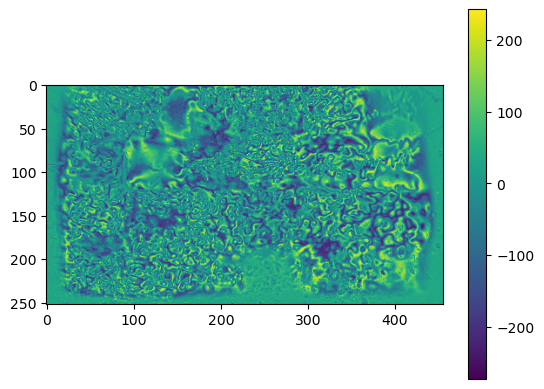

In [24]:
plt.imshow(pol_0[0, :, :] + pol_90[0, :, :] - pol_135[0, :, :] - pol_45[0, :, :])
plt.colorbar()

In [25]:
pol_0_normalized =   0.867 * pol_0 / (pol_0 + pol_90)
pol_90_normalized =  0.867 * pol_90 / (pol_0 + pol_90)
pol_45_normalized =  0.867 * pol_45 / (pol_135 + pol_45)
pol_135_normalized = 0.867 * pol_135 / (pol_135 + pol_45)

# a = 0, b = 90, c = 45, d = 135

In [26]:
delta2 = np.arcsin(np.sqrt((pol_0_normalized - pol_90_normalized) ** 2 + (pol_45_normalized - pol_135_normalized) ** 2))
psi2 = 0.5 * np.arctan2(-(pol_90_normalized - pol_0_normalized), (pol_45_normalized - pol_135_normalized))

In [27]:
np.isnan(delta2).sum()

def get_theta(delta, k):
    return np.sqrt(delta / k)

In [28]:
theta_inv = get_theta(delta2, ((np.pi * 1 * 0.05) / 0.532))

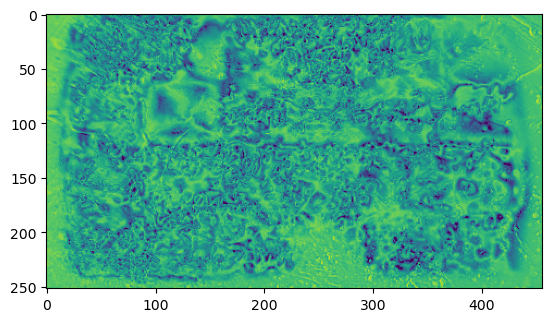

In [29]:
plt.imshow(theta_inv[0, :, :])

In [30]:
A = create_field(psi2, theta_inv)

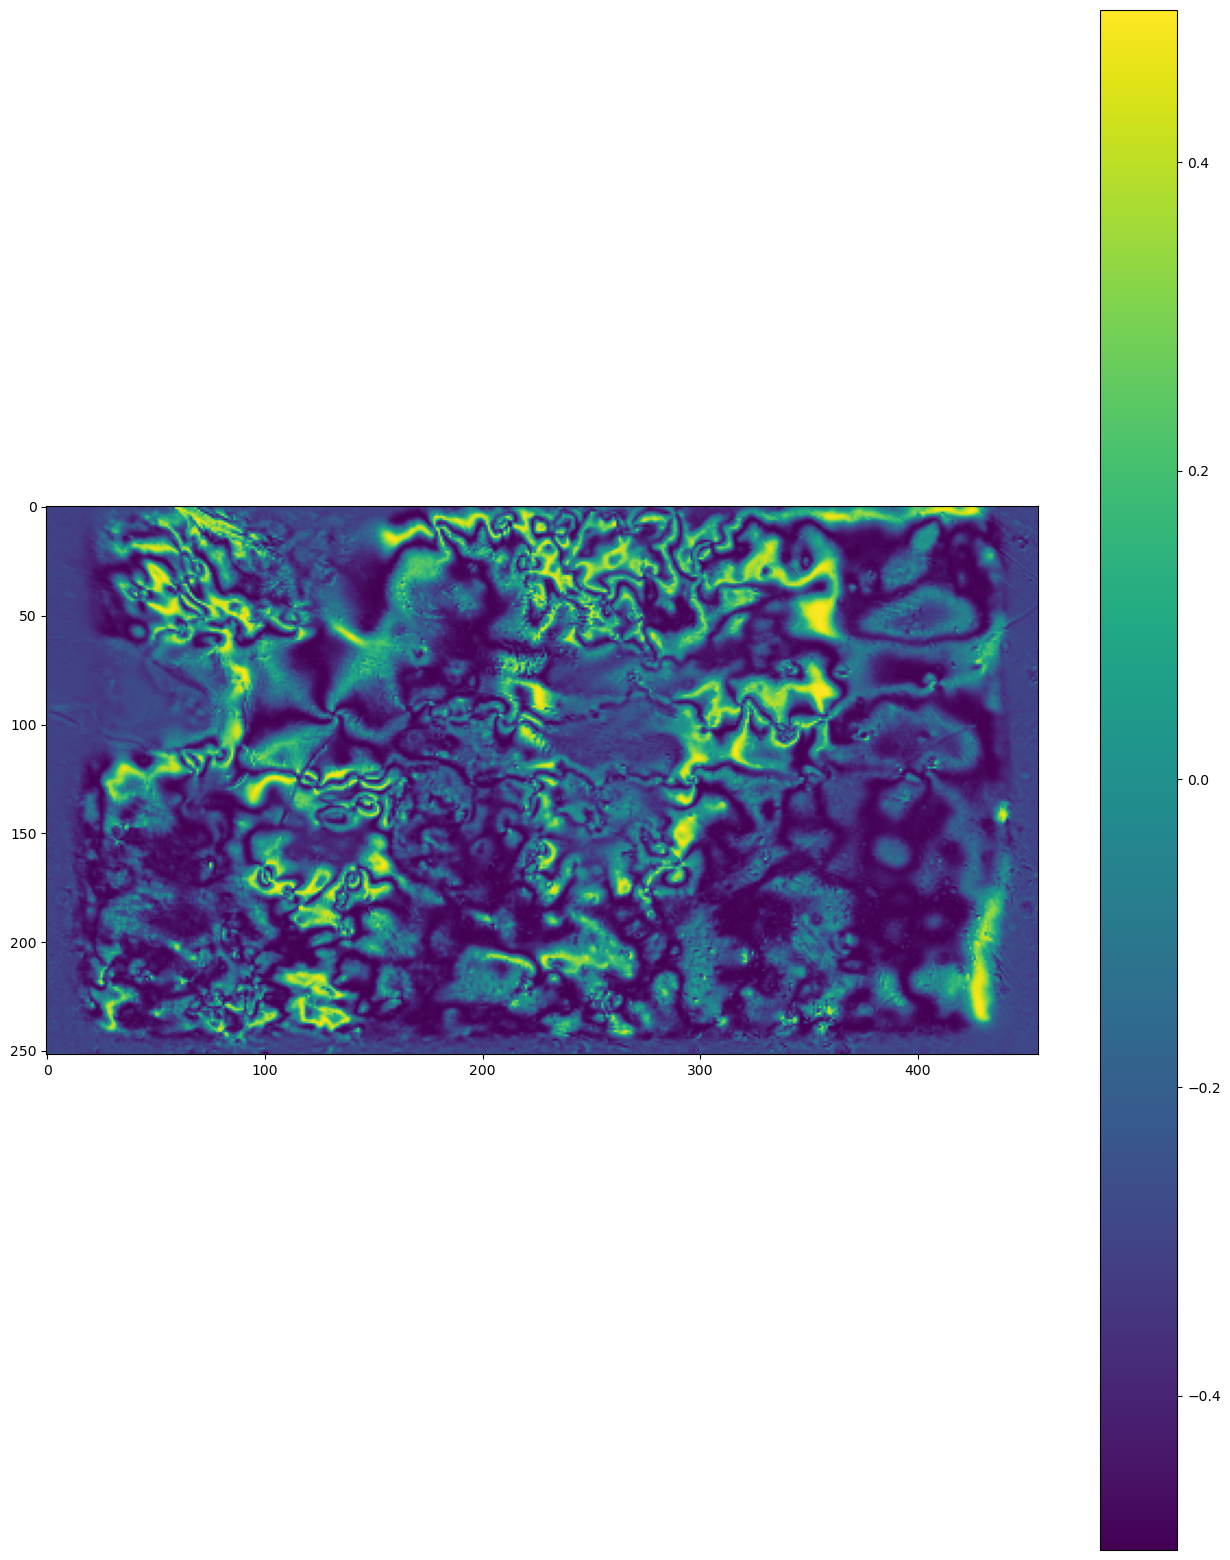

In [31]:
fig, axs = plt.subplots(figsize=(16, 20))
plt.imshow(A[299, :, :].real * A[299, :, :].imag)
plt.colorbar()

In [34]:
np.save("../A.npy",A)